<a href="https://colab.research.google.com/github/Towfiqpranto/Amazon-Review-Sentiment-Analysis/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import nltk

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data=pd.read_csv('gdrive/My Drive/Reviews.csv')
data.shape

(568454, 10)

In [ ]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


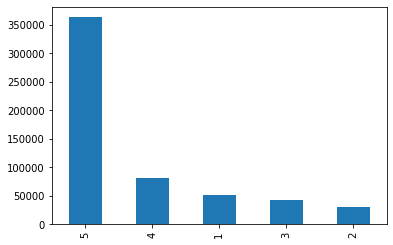

In [ ]:
data.Score.value_counts(normalize=False).plot(kind='bar')

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.word_tokenize(data.Text[0]),print(nltk.pos_tag(nltk.word_tokenize(data.Text[0])))

[('I', 'PRP'), ('have', 'VBP'), ('bought', 'VBN'), ('several', 'JJ'), ('of', 'IN'), ('the', 'DT'), ('Vitality', 'NNP'), ('canned', 'VBD'), ('dog', 'RP'), ('food', 'NN'), ('products', 'NNS'), ('and', 'CC'), ('have', 'VBP'), ('found', 'VBN'), ('them', 'PRP'), ('all', 'DT'), ('to', 'TO'), ('be', 'VB'), ('of', 'IN'), ('good', 'JJ'), ('quality', 'NN'), ('.', '.'), ('The', 'DT'), ('product', 'NN'), ('looks', 'VBZ'), ('more', 'RBR'), ('like', 'IN'), ('a', 'DT'), ('stew', 'NN'), ('than', 'IN'), ('a', 'DT'), ('processed', 'JJ'), ('meat', 'NN'), ('and', 'CC'), ('it', 'PRP'), ('smells', 'VBZ'), ('better', 'RBR'), ('.', '.'), ('My', 'PRP$'), ('Labrador', 'NNP'), ('is', 'VBZ'), ('finicky', 'JJ'), ('and', 'CC'), ('she', 'PRP'), ('appreciates', 'VBZ'), ('this', 'DT'), ('product', 'NN'), ('better', 'JJR'), ('than', 'IN'), ('most', 'JJS'), ('.', '.')]


(['I',
  'have',
  'bought',
  'several',
  'of',
  'the',
  'Vitality',
  'canned',
  'dog',
  'food',
  'products',
  'and',
  'have',
  'found',
  'them',
  'all',
  'to',
  'be',
  'of',
  'good',
  'quality',
  '.',
  'The',
  'product',
  'looks',
  'more',
  'like',
  'a',
  'stew',
  'than',
  'a',
  'processed',
  'meat',
  'and',
  'it',
  'smells',
  'better',
  '.',
  'My',
  'Labrador',
  'is',
  'finicky',
  'and',
  'she',
  'appreciates',
  'this',
  'product',
  'better',
  'than',
  'most',
  '.'],
 None)

In [ ]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> vader_lexicon



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('I hate you')

{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}

In [ ]:
data['result']=data.Text.apply(lambda x:sia.polarity_scores(x)['compound'])

In [ ]:
from tqdm import tqdm
res={}
for i,row in tqdm(data.iterrows(),total=len(data)):
  res[row['Id']]=sia.polarity_scores(row['Text'])

100%|██████████| 568454/568454 [10:58<00:00, 862.76it/s]


In [ ]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,result
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.8265
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.9468


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 5.3 MB/s 
     |████████████████████████████████| 7.6 MB 39.4 MB/s 
     |████████████████████████████████| 163 kB 36.9 MB/s 


In [ ]:
from transformers import AutoTokenizer,TFAutoModelForSequenceClassification

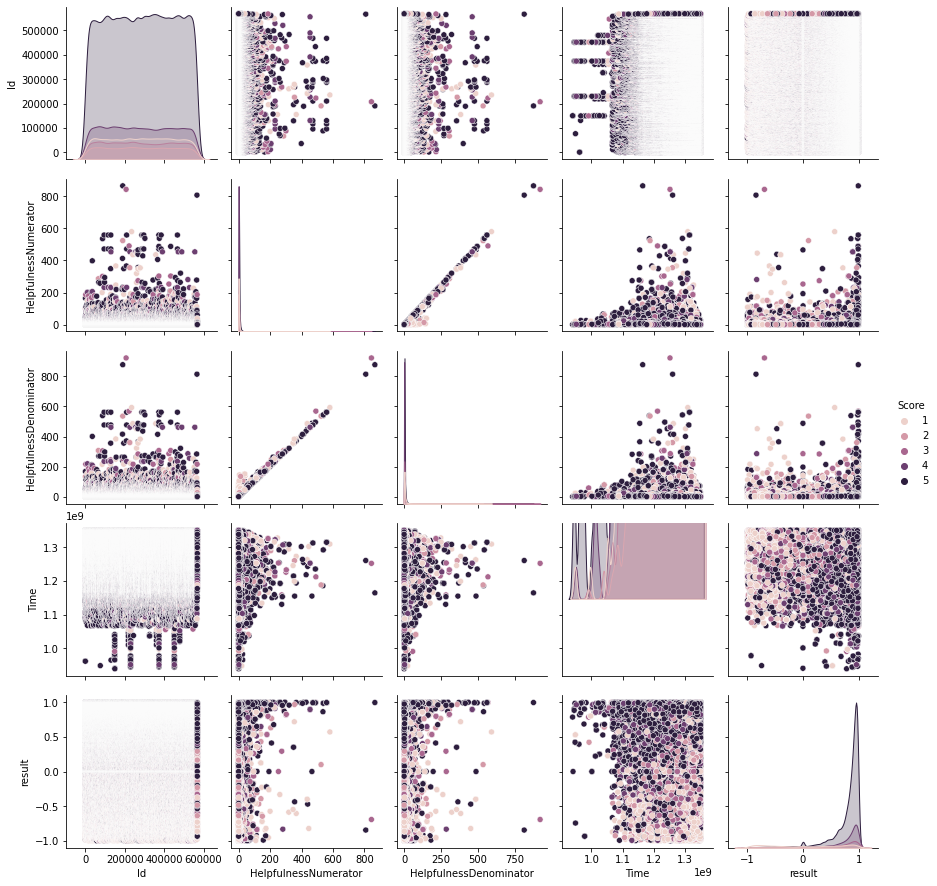

In [ ]:
sn.pairplot(data=data,hue='Score')

In [ ]:
TFAutoModelForSequenceClassification.from_pretrained("")